## WEATHER DATASET PREPROCESSING AND FEATURE ENGINEERING 🚀.

These will be the basic outline of steps that we'll be following in order clean and pre-process our data set:
1. Missing Values Treatment.
2. Outlier Treatment.
3. Redundant Columns Removal / Checking Co-relation.
4. Data Encoding or Data Split
5. Data Scaling (Normalization or Standardization)

In [209]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

#### STEP 1: Missing Values Treatment

In [210]:
def check_null_values(df):
    for column in df.columns.to_list():
        count = 0
        for isNullValue in df[column].isna().tolist():
            if isNullValue:
                count += 1
        if (count > 0):
            print(f'There are {count} null values in column {column}')

In [211]:
df = pd.read_csv('../../data/weather.csv')
check_null_values(df)

There are 517 null values in column Precip Type


Hence dropping all those 517 rows which has null values in their **Precip Type** column

In [212]:
df_cleaned = df.dropna(subset=['Precip Type'])
check_null_values(df_cleaned)

#### STEP 2: Outlier Treatment

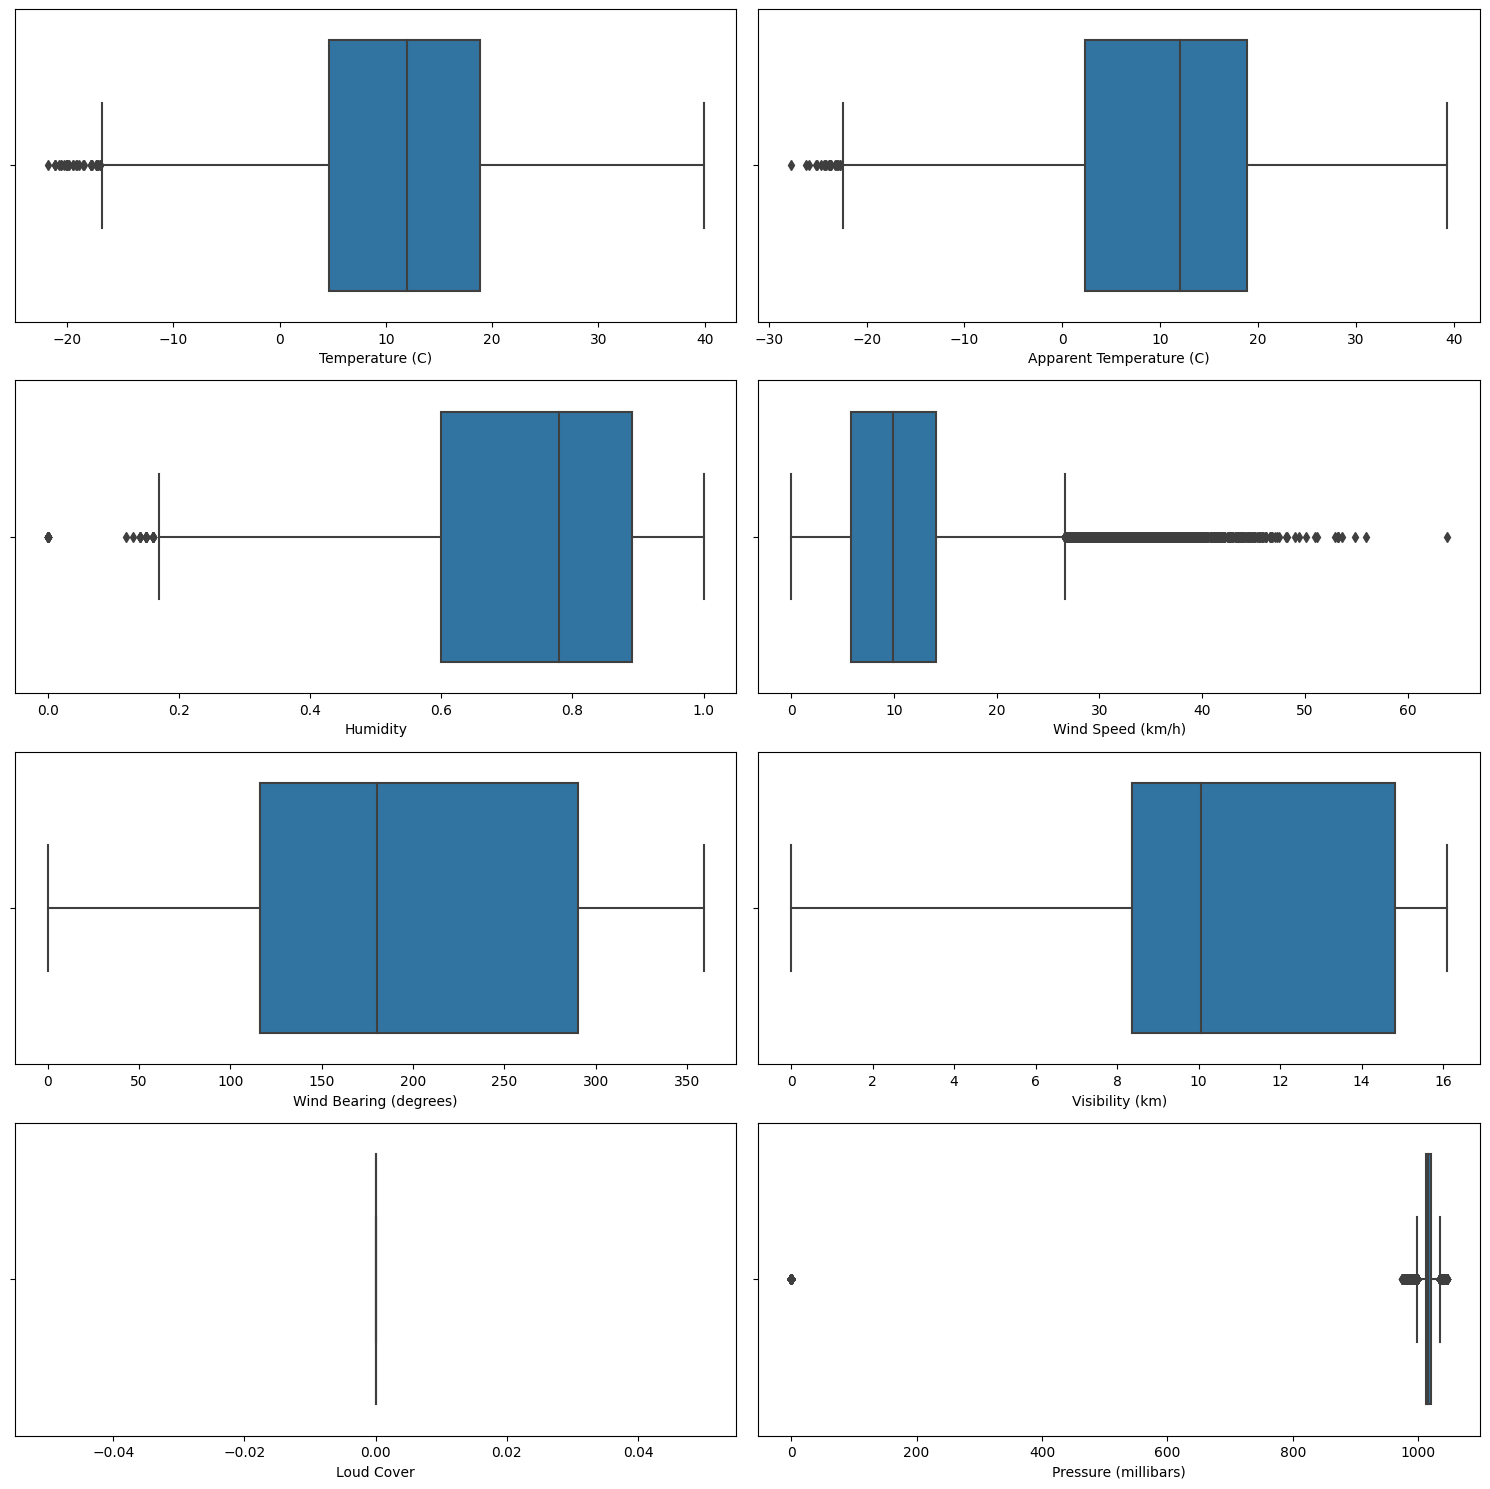

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.to_list()
# Set up the grid for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_cleaned[column], ax=axes[row, col])
    axes[row, col].set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [214]:
numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.drop('Summary', errors='ignore').to_list()
numerical_columns

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [215]:
min_threshold, max_threshold = df_cleaned['Temperature (C)'].quantile([0.0500, 0.900])
df_cleaned = df_cleaned[(df_cleaned['Temperature (C)'] < max_threshold) & (df_cleaned['Temperature (C)'] > min_threshold)]

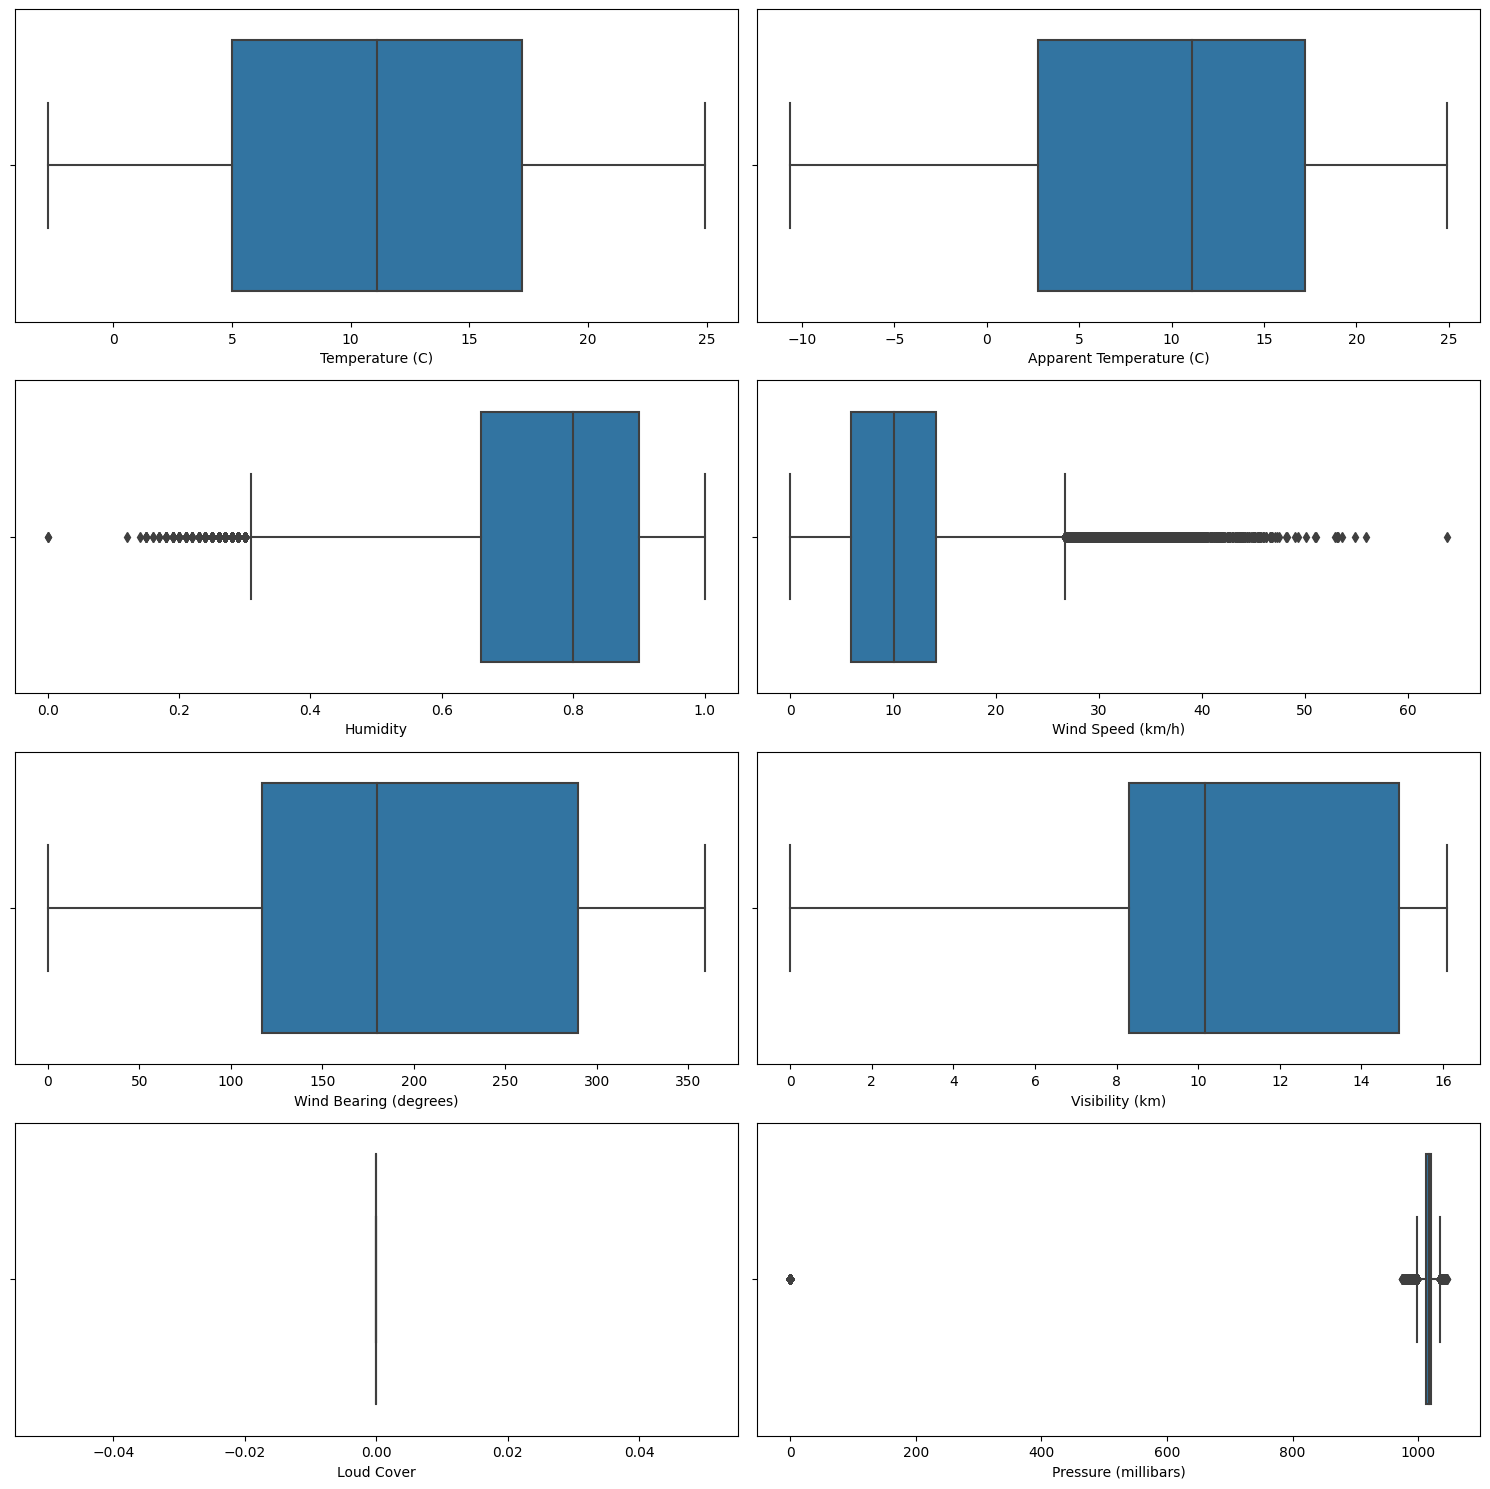

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.to_list()
# Set up the grid for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_cleaned[column], ax=axes[row, col])
    axes[row, col].set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [217]:
min_threshold, max_threshold = df_cleaned['Humidity'].quantile([0.0500, 0.900])
df_cleaned = df_cleaned[(df_cleaned['Humidity'] < max_threshold) & (df_cleaned['Humidity'] > min_threshold)]

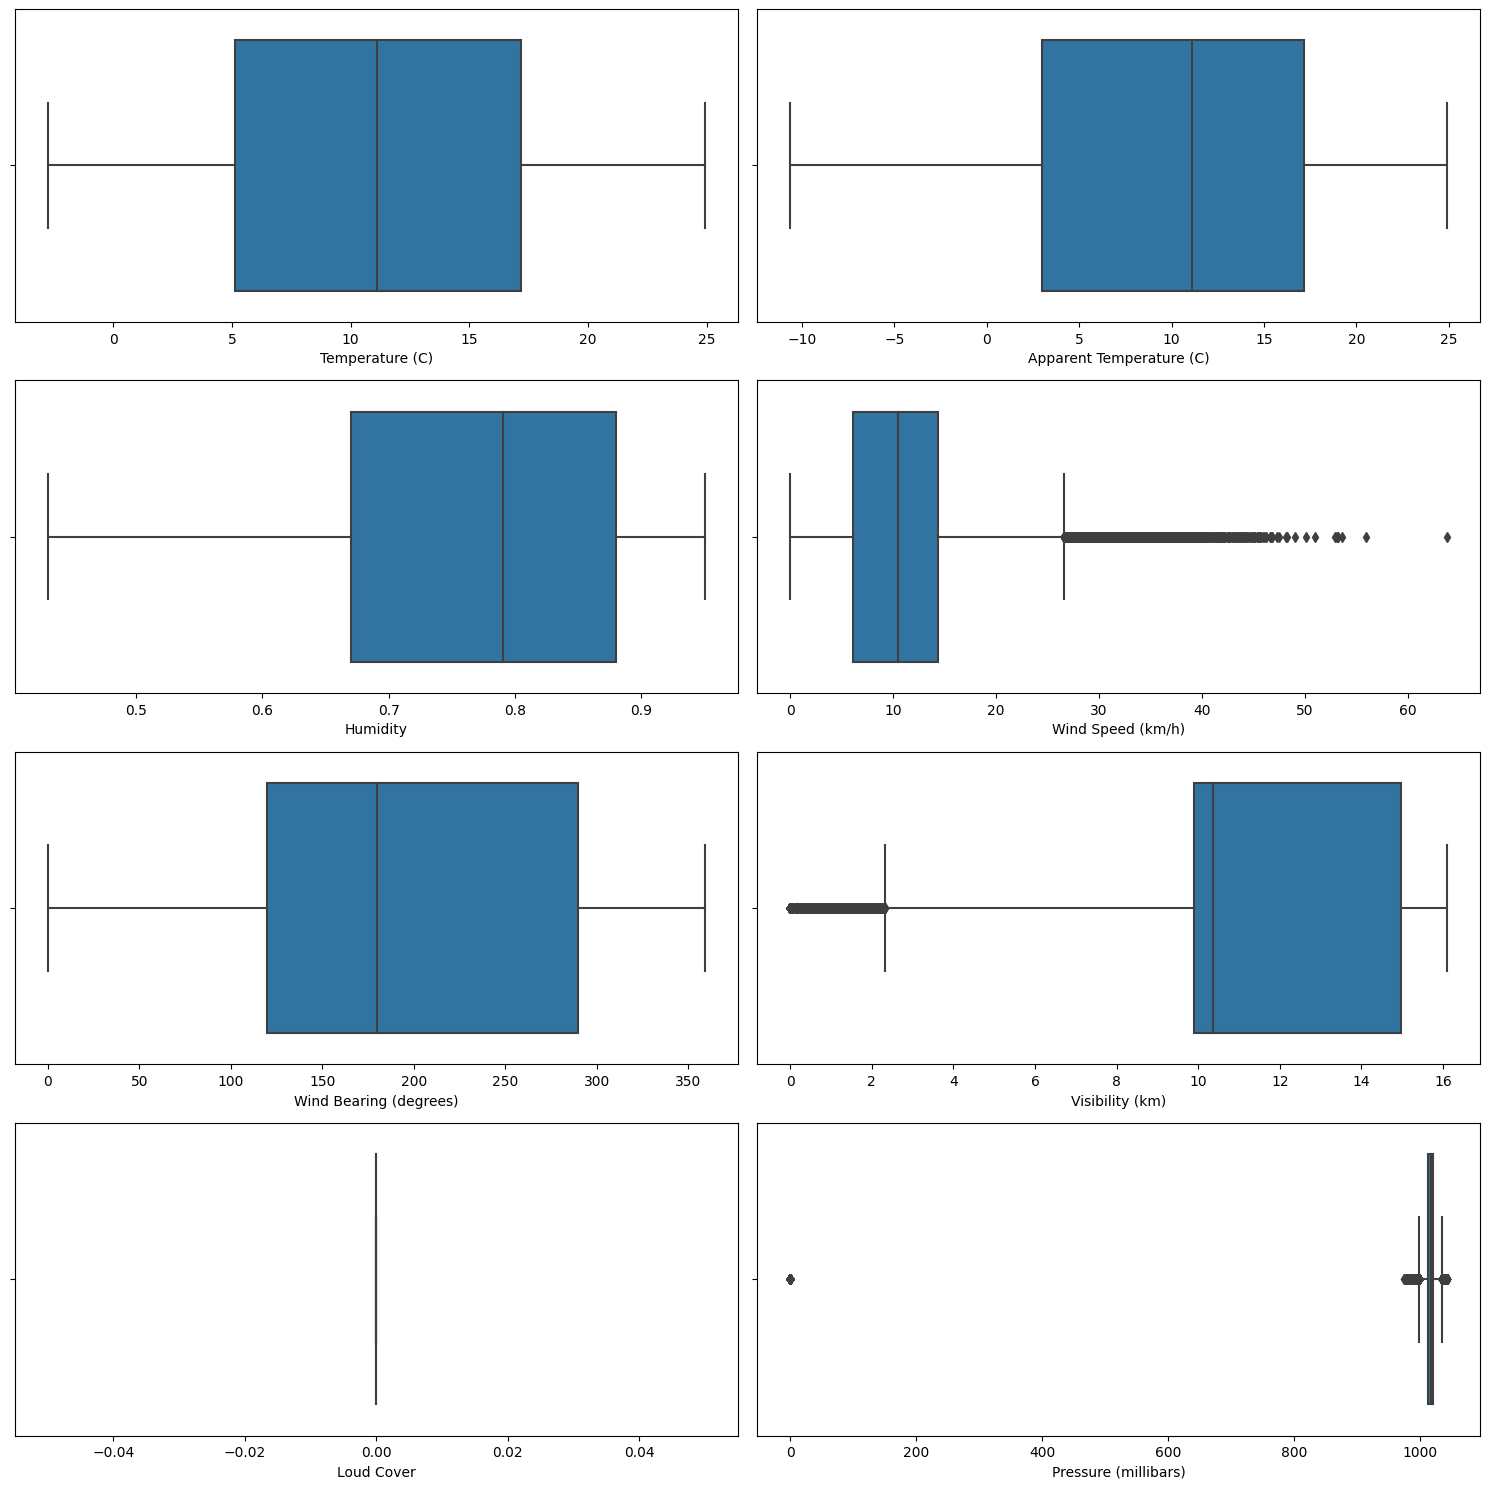

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.to_list()
# Set up the grid for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_cleaned[column], ax=axes[row, col])
    axes[row, col].set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [219]:
min_threshold, max_threshold = df_cleaned['Wind Speed (km/h)'].quantile([0.0500, 0.900])
df_cleaned = df_cleaned[(df_cleaned['Wind Speed (km/h)'] < max_threshold) & (df_cleaned['Wind Speed (km/h)'] > min_threshold)]

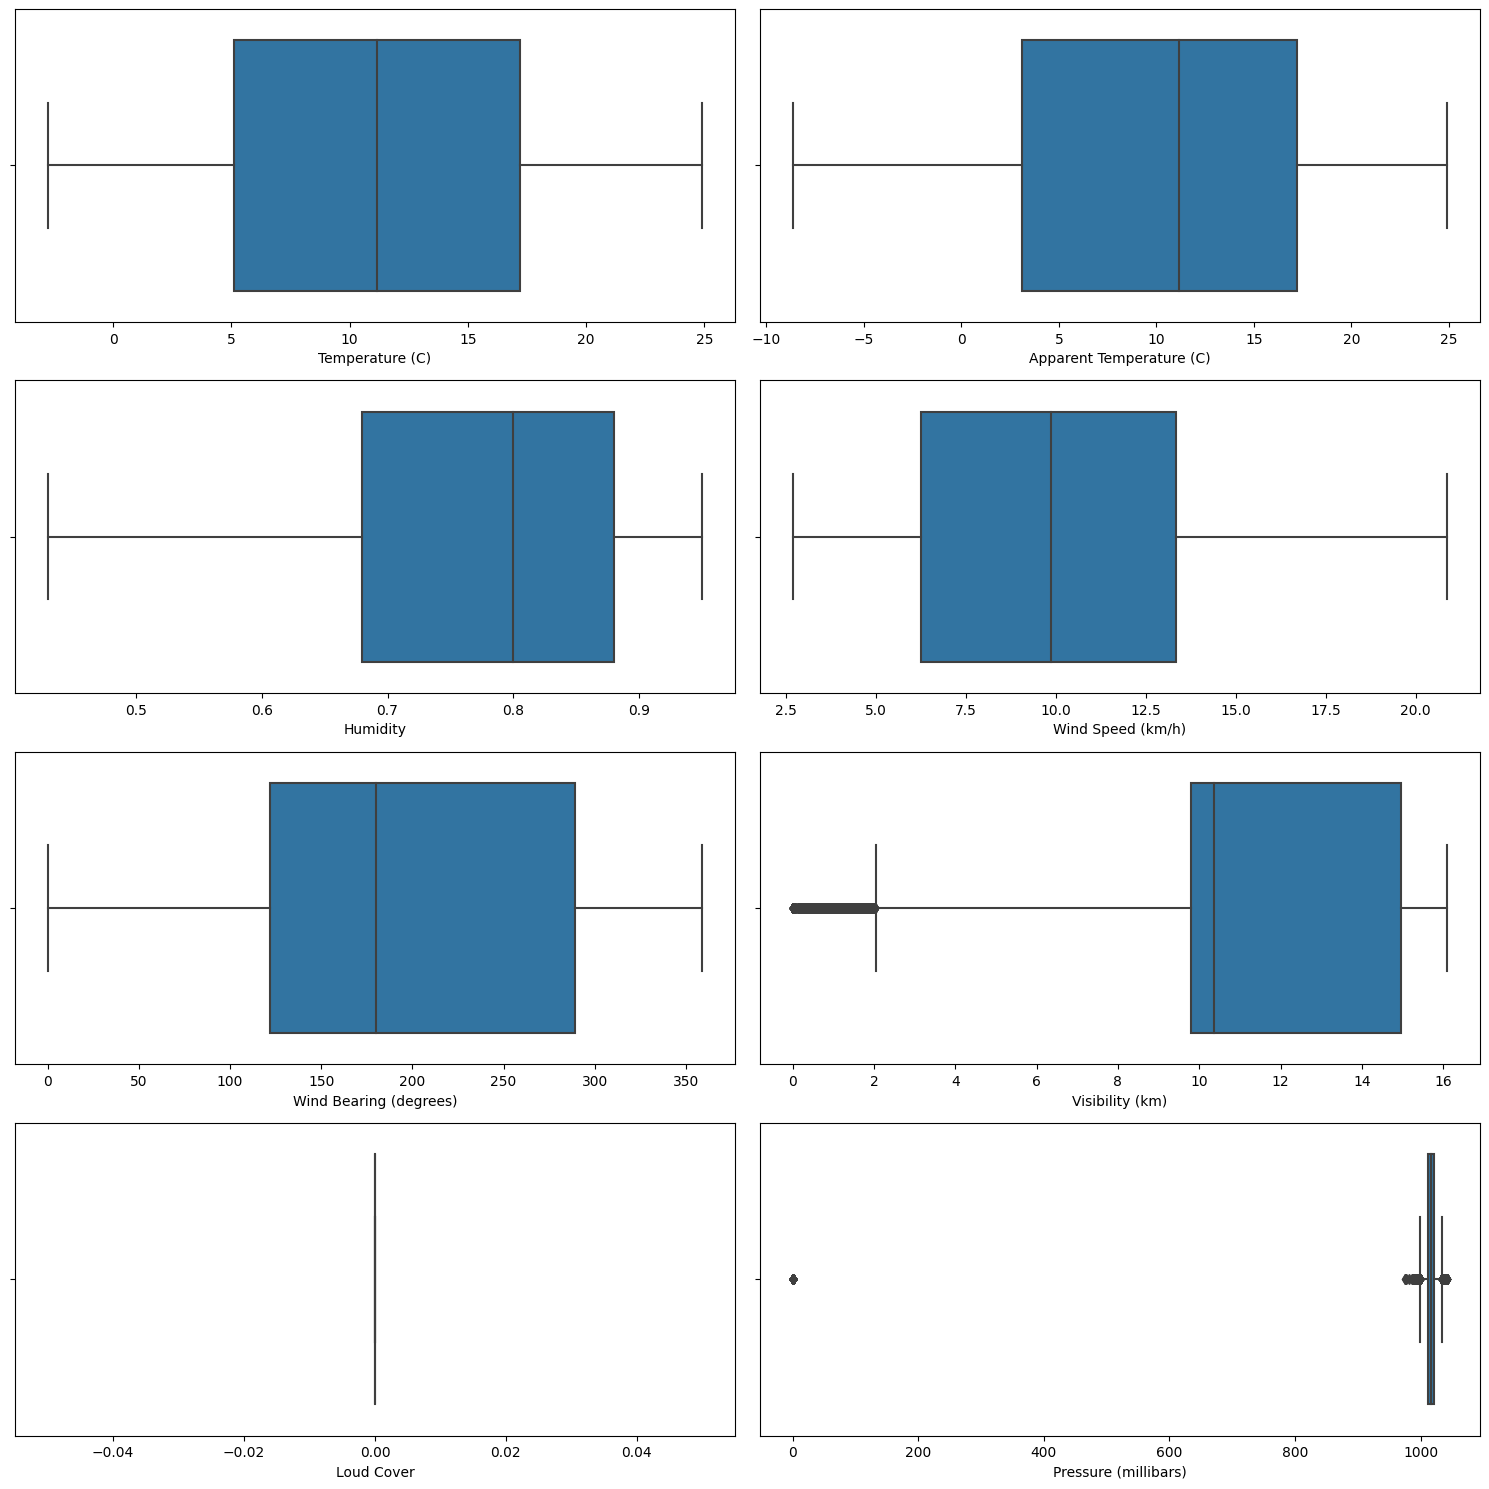

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.to_list()
# Set up the grid for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_cleaned[column], ax=axes[row, col])
    axes[row, col].set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [221]:
df_cleaned = df_cleaned[(df_cleaned['Pressure (millibars)'] != 0)]

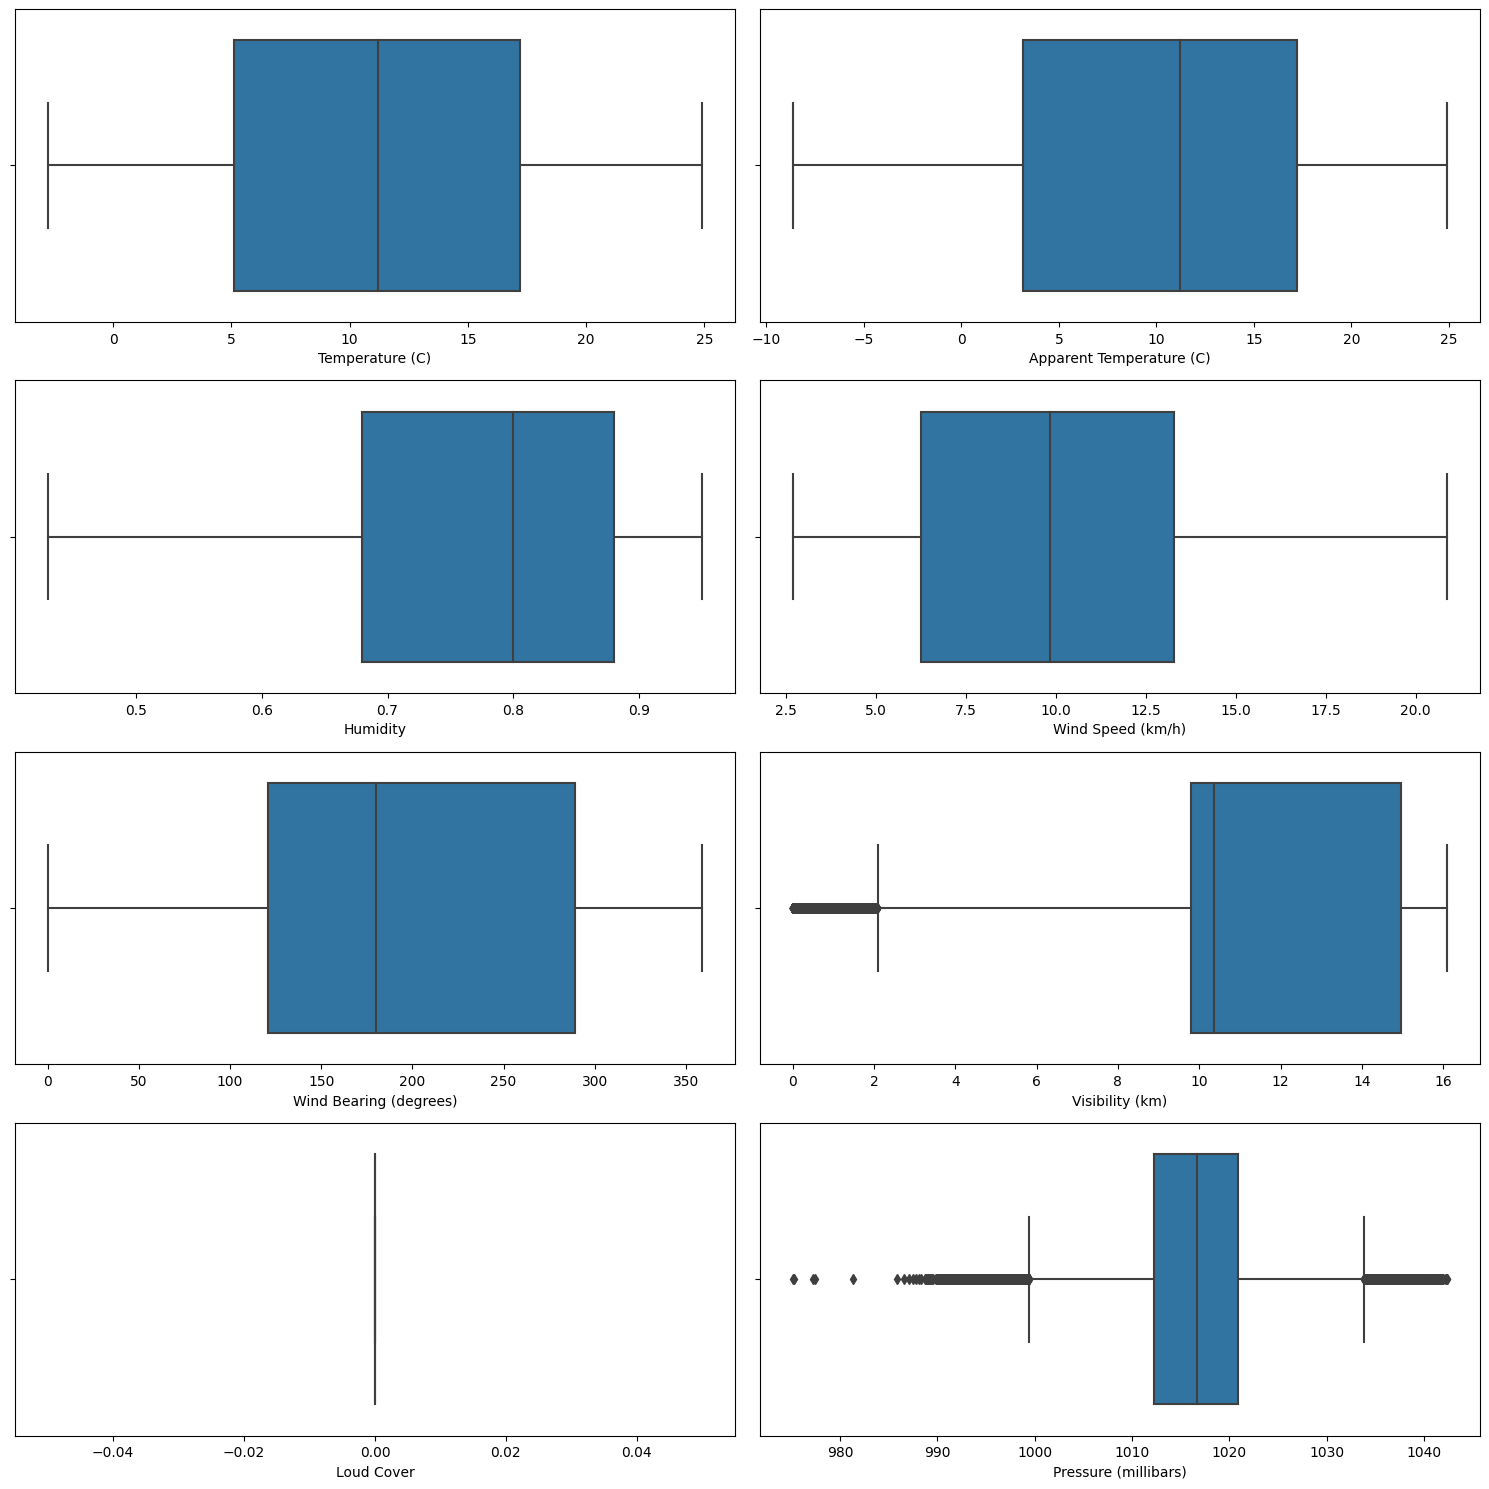

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df_cleaned.select_dtypes(include=np.number).columns.to_list()
# Set up the grid for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_cleaned[column], ax=axes[row, col])
    axes[row, col].set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [223]:
df_cleaned.shape

(57806, 12)

#### STEP 3: Redundant Columns Removal / Checking Co-Relation

In [224]:
# Finding the Co-relation matrix of the dataset so far.
non_numeric_columns = df_cleaned.select_dtypes(exclude=np.number).columns
df_numeric = df_cleaned.drop(non_numeric_columns, axis=1)
correlation_matrix = df_numeric.corr()
correlation_matrix

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.993356,-0.436118,-0.067092,0.010862,0.339184,NaN,-0.287559
Apparent Temperature (C),0.993356,1.000000,-0.419398,-0.130626,0.013867,0.333928,NaN,-0.268710
Humidity,-0.436118,-0.419398,1.000000,-0.170628,0.053025,-0.296848,NaN,-0.042816
Wind Speed (km/h),-0.067092,-0.130626,-0.170628,1.000000,0.018529,0.003875,NaN,-0.177986
Wind Bearing (degrees),0.010862,0.013867,0.053025,0.018529,1.000000,0.045711,NaN,-0.051539
Visibility (km),0.339184,0.333928,-0.296848,0.003875,0.045711,1.000000,NaN,-0.110652
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.287559,-0.268710,-0.042816,-0.177986,-0.051539,-0.110652,NaN,1.000000


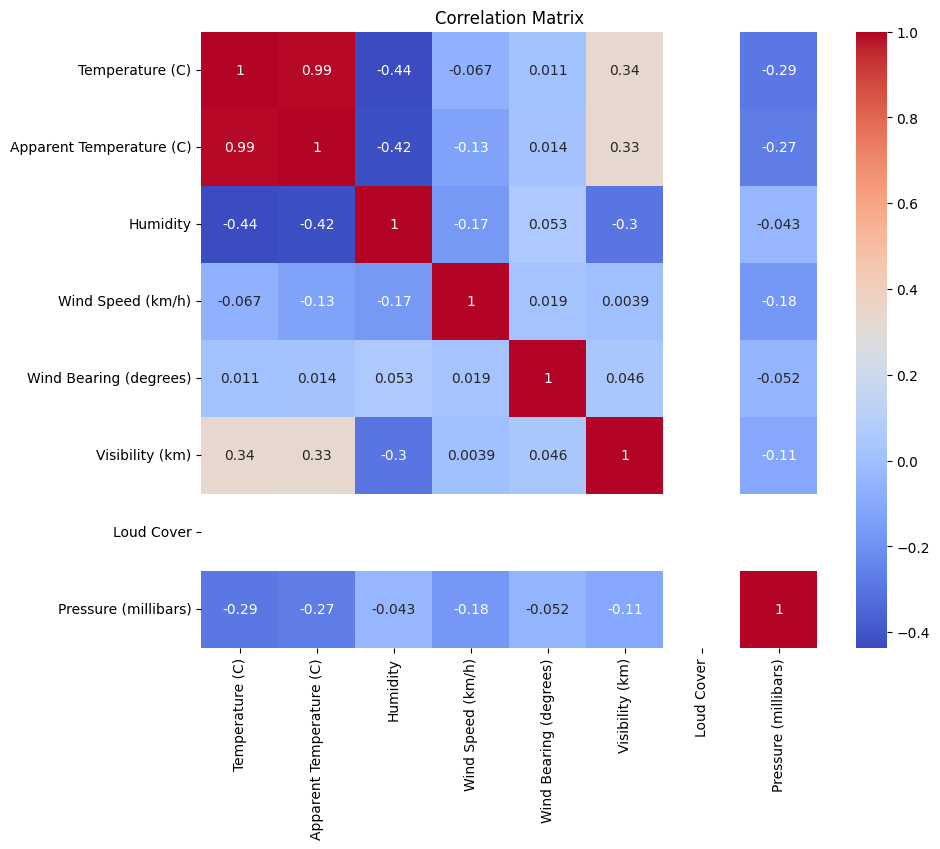

In [225]:
# Now Visualizing the Co-relation matrix as a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [226]:
# Finding the co-related columns by comparing them with a fixed threshold
threshold = 0.7
correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)

correlated_columns

{'Apparent Temperature (C)'}

In [227]:
# Removing the Co-related column 'Apparent Temperature (C)' from the cleaned dataset so far.
df_cleaned = df_cleaned.drop(correlated_columns, axis=1)
# df_cleaned

#### STEP 4: Data Encoding or Data Split

In [228]:
# Selecting Only Three Classes and Removing the Rest of them.
df_cleaned['Summary'].value_counts()

Summary
Mostly Cloudy              19576
Partly Cloudy              18692
Overcast                   10965
Clear                       6607
Foggy                       1822
Light Rain                    53
Drizzle                       34
Humid and Mostly Cloudy       28
Humid and Partly Cloudy       16
Rain                           7
Humid and Overcast             6
Name: count, dtype: int64

In [229]:
# Taking the top three most occurred classes i.e ('Mostly Cloudy', 'Partly Cloudy', and 'Overcast').
top_classes = ['Mostly Cloudy', 'Partly Cloudy', 'Overcast']
df_cleaned = df_cleaned[df_cleaned['Summary'].isin(top_classes)]
df_cleaned['Summary'].value_counts()

Summary
Mostly Cloudy    19576
Partly Cloudy    18692
Overcast         10965
Name: count, dtype: int64

In [230]:
# Seeing how many textual are there which need to be encoded
df_cleaned.select_dtypes(exclude=np.number).columns.to_list()

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [231]:
# First encoding the Target Attribute by Label Encoding Scheme.
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(df_cleaned['Summary'])
df_cleaned['Summary'] = encoded_column
# df_cleaned.head()

In [232]:
df_cleaned.select_dtypes(exclude=np.number).columns.to_list()

['Formatted Date', 'Precip Type', 'Daily Summary']

In [233]:
# Checking the 'Precip Type' column to see which encoding technique to apply.
df_cleaned['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [234]:
# Encoding the "Precip Type" column using the Lable Encoder Technique as it has only two unique values.
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(df_cleaned['Precip Type'])
df_cleaned['Precip Type'] = encoded_column
# df_cleaned.head()

In [235]:
# Checking the 'Daily Summary' column to see which encoding technique to apply.
df_cleaned['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [236]:
# Encoding the "Daily Summary" column using the Binary Encoder Technique as it has many unique values.
# Create a BinaryEncoder object
binary_encoder = ce.BinaryEncoder(cols=['Daily Summary'])
# Apply Binary Encoding to the "Daily Summary" column
df_cleaned = binary_encoder.fit_transform(df_cleaned)
df_cleaned.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary_0,Daily Summary_1,Daily Summary_2,Daily Summary_3,Daily Summary_4,Daily Summary_5,Daily Summary_6,Daily Summary_7
0,2006-04-01 00:00:00.000 +0200,2,0,9.472222,0.89,14.1197,251,15.8263,0,1015.13,0,0,0,0,0,0,0,1
1,2006-04-01 01:00:00.000 +0200,2,0,9.355556,0.86,14.2646,259,15.8263,0,1015.63,0,0,0,0,0,0,0,1
2,2006-04-01 02:00:00.000 +0200,0,0,9.377778,0.89,3.9284,204,14.9569,0,1015.94,0,0,0,0,0,0,0,1
3,2006-04-01 03:00:00.000 +0200,2,0,8.288889,0.83,14.1036,269,15.8263,0,1016.41,0,0,0,0,0,0,0,1
4,2006-04-01 04:00:00.000 +0200,0,0,8.755556,0.83,11.0446,259,15.8263,0,1016.51,0,0,0,0,0,0,0,1


In [237]:
# Checking the 'Formatted Date' column to see which encoding technique to apply.
df_cleaned['Formatted Date'].unique()

array(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', ...,
       '2016-09-09 21:00:00.000 +0200', '2016-09-09 22:00:00.000 +0200',
       '2016-09-09 23:00:00.000 +0200'], dtype=object)

In [241]:
# Encoding the "Formatted Date" column using the Label Encoder Technique as it has many unique values.
label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(df_cleaned['Formatted Date'])
df_cleaned['Formatted Date'] = encoded_column
df_cleaned

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary_0,Daily Summary_1,Daily Summary_2,Daily Summary_3,Daily Summary_4,Daily Summary_5,Daily Summary_6,Daily Summary_7
0,999,2,0,9.472222,0.89,14.1197,251,15.8263,0,1015.13,0,0,0,0,0,0,0,1
1,1000,2,0,9.355556,0.86,14.2646,259,15.8263,0,1015.63,0,0,0,0,0,0,0,1
2,1001,0,0,9.377778,0.89,3.9284,204,14.9569,0,1015.94,0,0,0,0,0,0,0,1
3,1002,2,0,8.288889,0.83,14.1036,269,15.8263,0,1016.41,0,0,0,0,0,0,0,1
4,1003,0,0,8.755556,0.83,11.0446,259,15.8263,0,1016.51,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96439,47367,2,0,22.872222,0.59,6.4239,49,16.1000,0,1015.65,0,0,0,0,1,0,1,1
96449,47368,2,0,24.583333,0.48,10.0947,20,15.5526,0,1015.16,0,0,0,0,1,0,1,1
96450,47369,2,0,22.038889,0.56,8.9838,30,16.1000,0,1015.66,0,0,0,0,1,0,1,1
96451,47370,2,0,21.522222,0.60,10.5294,20,16.1000,0,1015.95,0,0,0,0,1,0,1,1
